<a href="https://colab.research.google.com/github/riclops17/DatosVis/blob/main/PASOr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analisis elecciones PASO en R**
* Ricardo Bauch
* Sofía Feilbogen
* Agustina Gonzalez Crespo


### Importamos y cargamos

In [ ]:
library(ggplot2)
system("wget https://aaizemberg.github.io/2021/data/mesas.zip") # y si yo decido 
system("unzip mesas.zip")
data <- read.delim("mesas.tsv")
summary(data)


  Agrupacion           Cargo               Codigo         Distrito        
 Length:321103      Length:321103      Min.   :   1.0   Length:321103     
 Class :character   Class :character   1st Qu.: 254.0   Class :character  
 Mode  :character   Mode  :character   Median : 482.0   Mode  :character  
                                       Mean   : 506.1                     
                                       3rd Qu.: 777.0                     
                                       Max.   :1032.0                     
                                                                          
 Establecimiento       Fecha              IdCargo        IdCircuito    
 Length:321103      Length:321103      Min.   :3.000   Min.   :  1.00  
 Class :character   Class :character   1st Qu.:3.000   1st Qu.: 54.00  
 Mode  :character   Mode  :character   Median :6.000   Median : 90.00  
                                       Mean   :4.504   Mean   : 90.35  
                                       3

### Vistas previas

In [ ]:

data2 <- read.csv("https://raw.githubusercontent.com/riclops17/DatosVis/main/resultados-definitivos-elecciones-generales-2019.csv")


In [ ]:
View(data2)

total_votos,t_carele_reg,partido_codigo,partido_descripcion,cargo_codigo,cargo_descripcion,seccion_codigo,circuito_codigo,mesa_numero,sexo,comuna
<int>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<dbl>,<int>,<chr>,<chr>
4,300,87,UNITE POR LA LIBERTAD Y LA DIG,DL,DIP.LEGIS.CABA,1,1,1,X,COMUNA 1
5,300,87,UNITE POR LA LIBERTAD Y LA DIG,DL,DIP.LEGIS.CABA,1,1,2,X,COMUNA 1
5,300,87,UNITE POR LA LIBERTAD Y LA DIG,DL,DIP.LEGIS.CABA,1,1,3,X,COMUNA 1
8,300,87,UNITE POR LA LIBERTAD Y LA DIG,DL,DIP.LEGIS.CABA,1,1,4,X,COMUNA 1
3,300,87,UNITE POR LA LIBERTAD Y LA DIG,DL,DIP.LEGIS.CABA,1,1,5,X,COMUNA 1
4,300,87,UNITE POR LA LIBERTAD Y LA DIG,DL,DIP.LEGIS.CABA,1,1,6,X,COMUNA 1
4,300,87,UNITE POR LA LIBERTAD Y LA DIG,DL,DIP.LEGIS.CABA,1,1,7,X,COMUNA 1
6,300,87,UNITE POR LA LIBERTAD Y LA DIG,DL,DIP.LEGIS.CABA,1,1,8,X,COMUNA 1
3,300,87,UNITE POR LA LIBERTAD Y LA DIG,DL,DIP.LEGIS.CABA,1,1,9,X,COMUNA 1


In [ ]:
View(data)

Agrupacion,Cargo,Codigo,Distrito,Establecimiento,Fecha,IdCargo,IdCircuito,IdDistrito,IdSeccion,Mesa,Seccion,idAgrupacion,idAgrupacionInt,idLista,lista,tipoVoto,votos
<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<int>
,DIPUTADOS NACIONALES,1,Ciudad Autónoma de Buenos Aires,Esc. Nº26 Hipólito Yrigoyen,12-09-2021 19:54,3,1,1,1,00001X,Comuna 1,NA,NA,NA,,nulos,0
,DIPUTADOS NACIONALES,1,Ciudad Autónoma de Buenos Aires,Esc. Nº26 Hipólito Yrigoyen,12-09-2021 19:54,3,1,1,1,00001X,Comuna 1,NA,NA,NA,,recurridos,0
,DIPUTADOS NACIONALES,1,Ciudad Autónoma de Buenos Aires,Esc. Nº26 Hipólito Yrigoyen,12-09-2021 19:54,3,1,1,1,00001X,Comuna 1,NA,NA,NA,,comando,0
,DIPUTADOS NACIONALES,1,Ciudad Autónoma de Buenos Aires,Esc. Nº26 Hipólito Yrigoyen,12-09-2021 19:54,3,1,1,1,00001X,Comuna 1,NA,NA,NA,,blancos,3
,DIPUTADOS NACIONALES,1,Ciudad Autónoma de Buenos Aires,Esc. Nº26 Hipólito Yrigoyen,12-09-2021 19:54,3,1,1,1,00001X,Comuna 1,NA,NA,NA,,impugnados,0
FEDERAL,DIPUTADOS NACIONALES,1,Ciudad Autónoma de Buenos Aires,Esc. Nº26 Hipólito Yrigoyen,12-09-2021 19:54,3,1,1,1,00001X,Comuna 1,8,1,1,FEDERALISMO PURO,positivo,0
AUTONOMISTA,DIPUTADOS NACIONALES,1,Ciudad Autónoma de Buenos Aires,Esc. Nº26 Hipólito Yrigoyen,12-09-2021 19:54,3,1,1,1,00001X,Comuna 1,36,2,1,COLORADA,positivo,0
MOVIMIENTO LIBRES DEL SUR,DIPUTADOS NACIONALES,1,Ciudad Autónoma de Buenos Aires,Esc. Nº26 Hipólito Yrigoyen,12-09-2021 19:54,3,1,1,1,00001X,Comuna 1,40,3,1,ALTERNATIVA CIUDADANA,positivo,1
RENOVADOR FEDERAL,DIPUTADOS NACIONALES,1,Ciudad Autónoma de Buenos Aires,Esc. Nº26 Hipólito Yrigoyen,12-09-2021 19:54,3,1,1,1,00001X,Comuna 1,79,4,1,UNO - UNA NUEVA OPCIÓN,positivo,0



library(ggplot2)
library(RColorBrewer)
p <- ggplot(data = data, aes(x= Agrupacion , y= Seccion, fill= Agrupacion))+
  geom_bar(stat="identity") + coord_flip()+scale_fill_brewer(palette="Accent")
p





## **Visualización 1 y 2**

Por comuna y agrupación/partido descripción cuantos votos se realizaron, se filtra tambien 3 tipos de votos. Diferenciamos entre las PASO del 2021 y del 2019. 

* Votos en blanco: Se manifiesta que ninguna de las opciones planteadas es adecuada.
* Voto nulo: Es un voto mal realizado en una elección, al punto que acarrea su nulidad
* Voto recurrido: Es un voto que no se computa. Será analizado y clasificado en el escrutinio definitivo, momento en el que será volcado en otras clases de votos.

In [ ]:
install.packages("scales")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



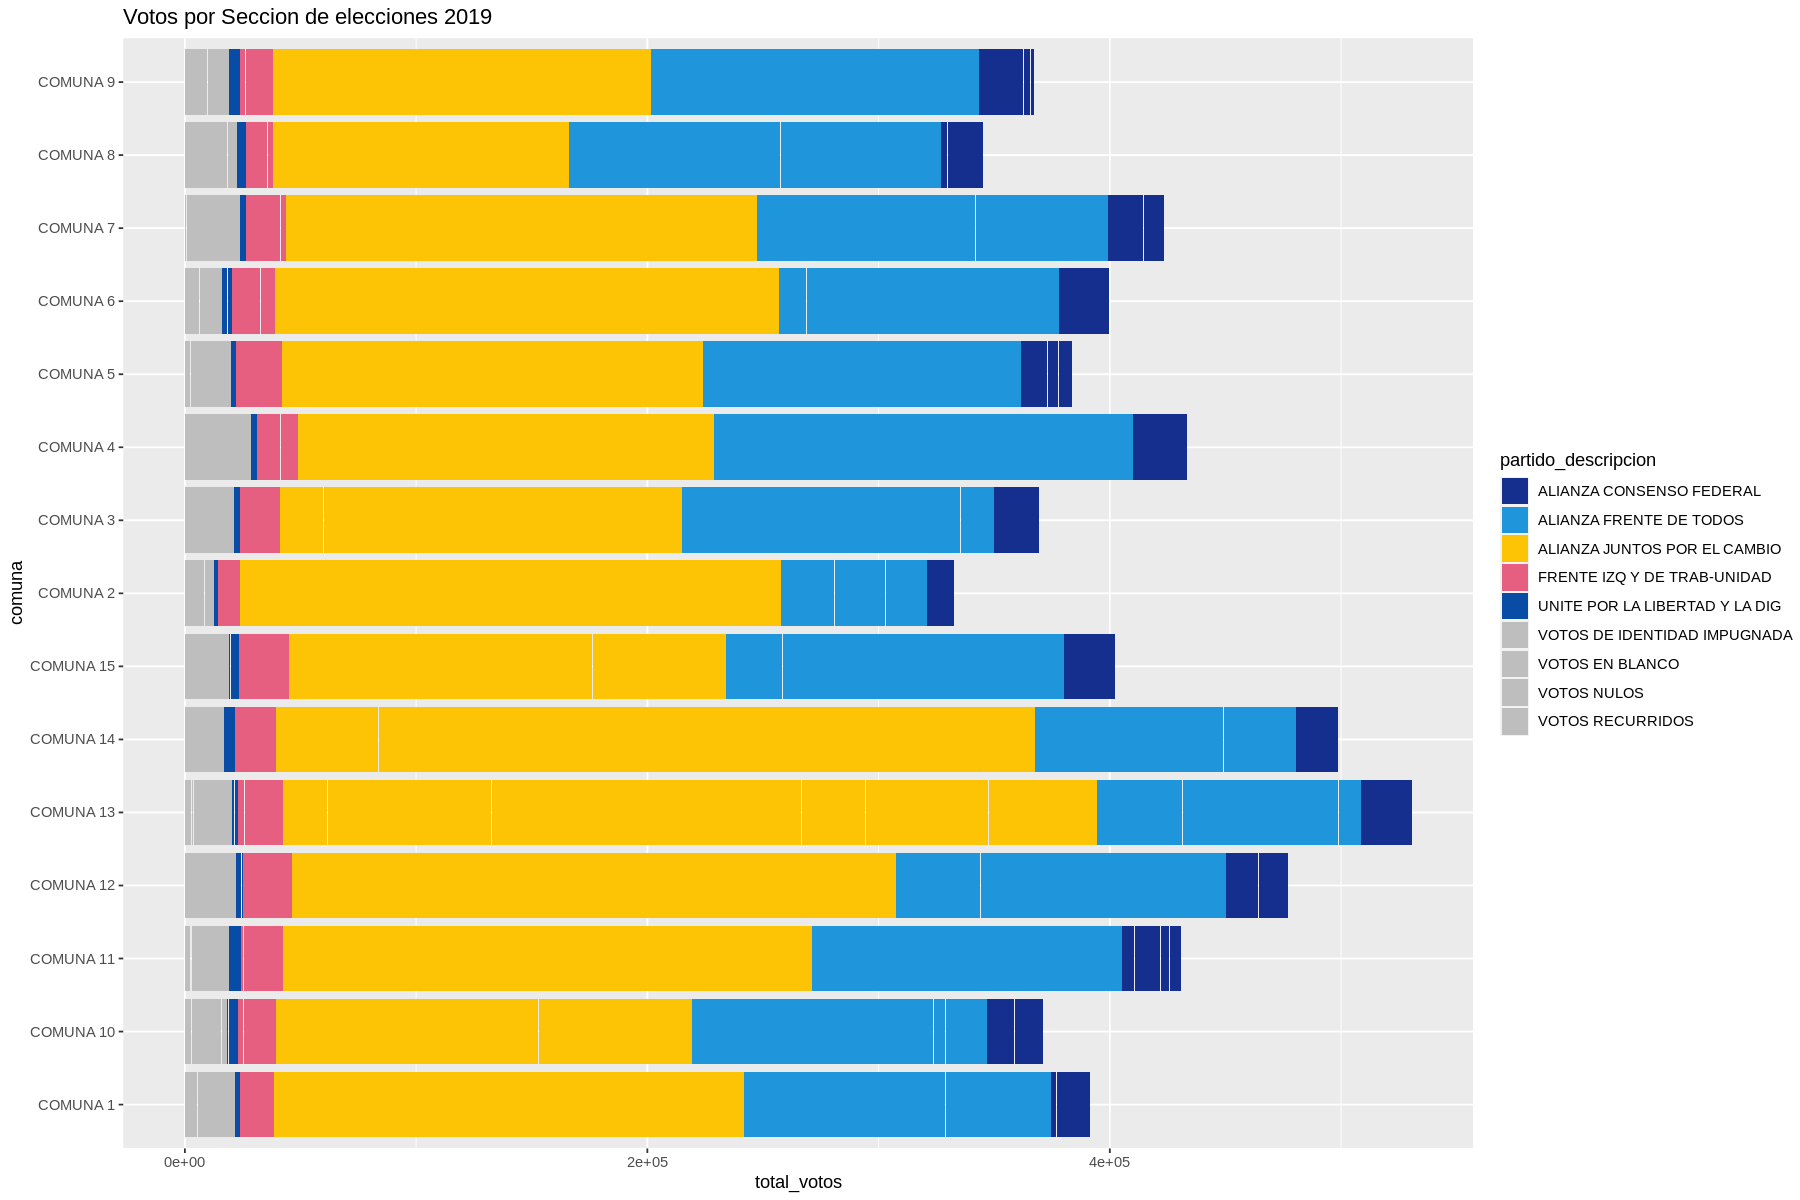

In [ ]:
options(repr.plot.width=15, repr.plot.height=10)
ggplot(data2, aes(x=comuna, y=total_votos, fill = partido_descripcion))+
  geom_bar(stat = "identity") + 
  coord_flip() + 
  scale_fill_manual(values = c("#152f8f","#1f95db",  "#fcc404", "#e65f80", "#084ca5",'grey','grey',"grey","grey")) + 
  ggtitle("Votos por Seccion de elecciones 2019")

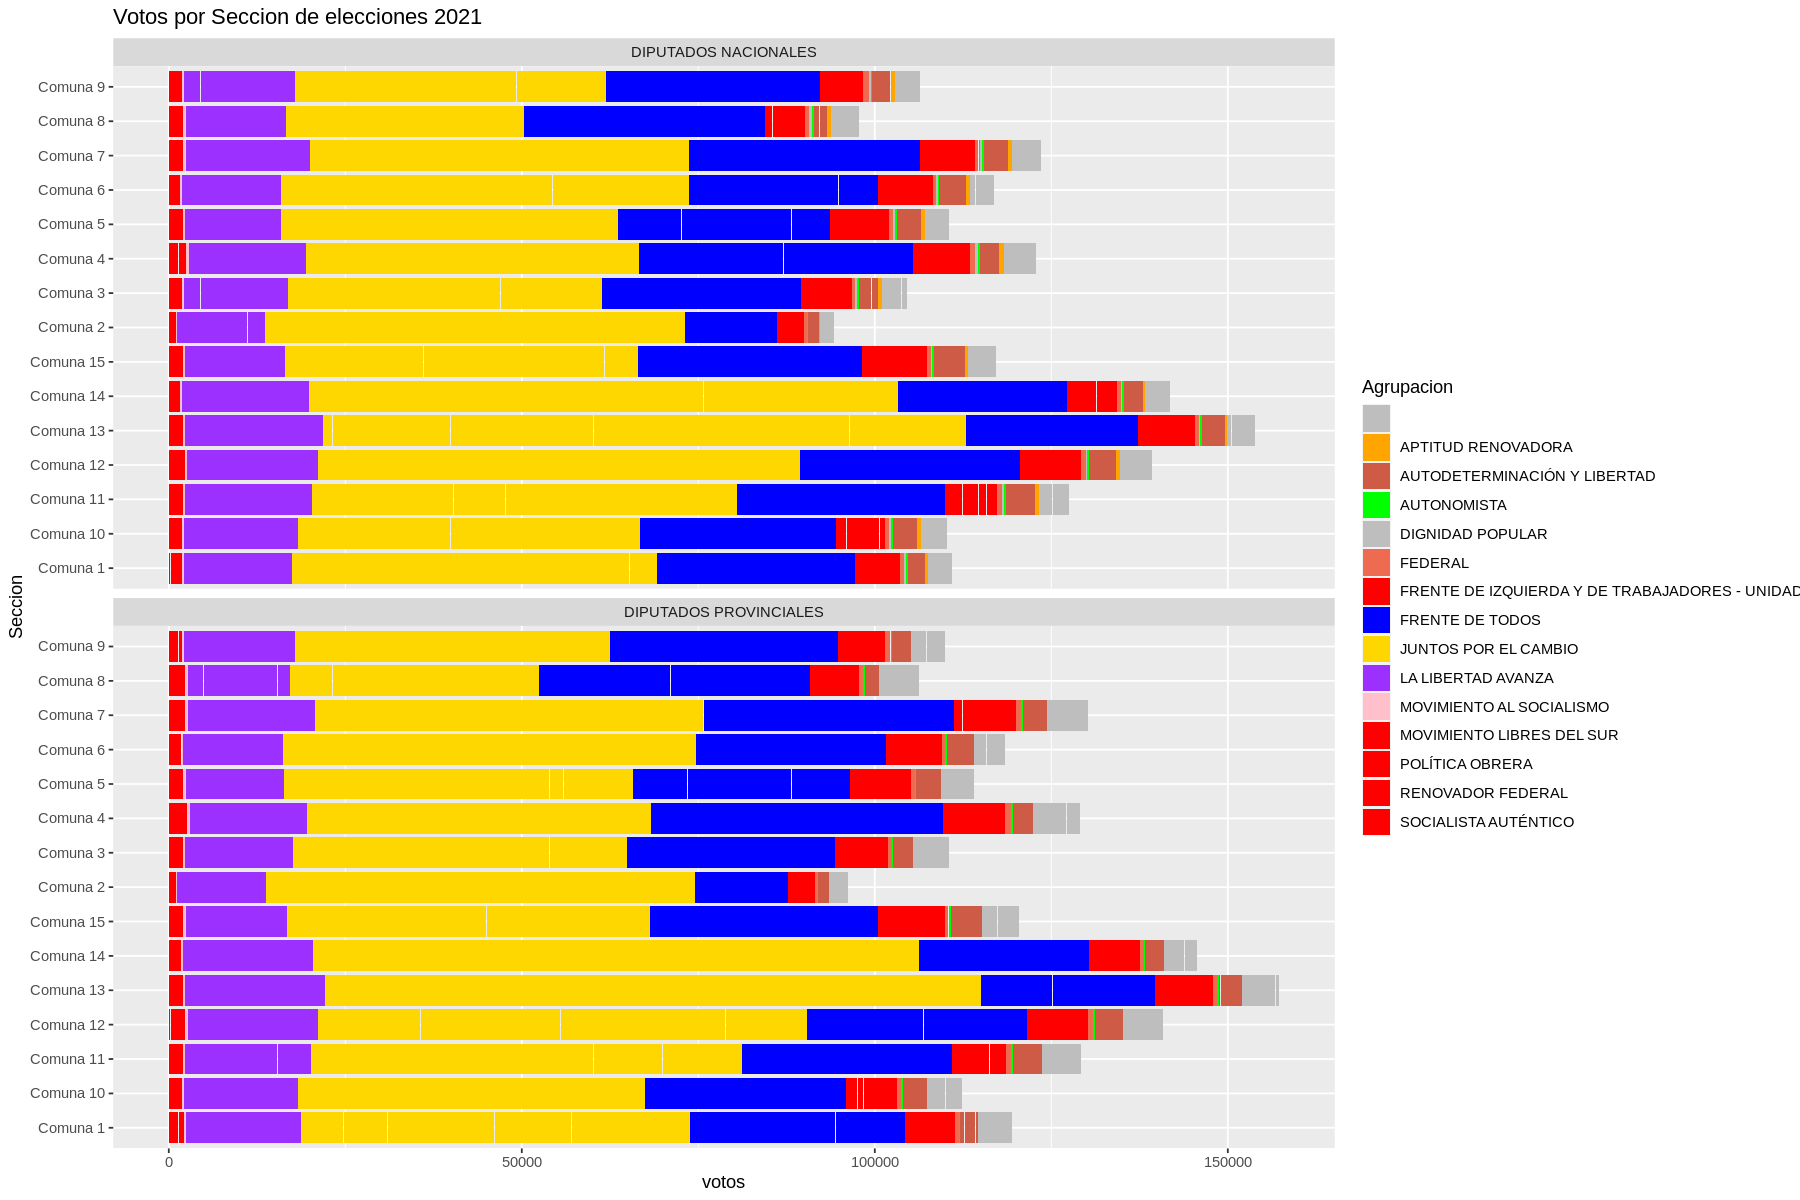

In [ ]:
options(repr.plot.width=15, repr.plot.height=10)
ggplot(data, aes(x=Seccion, y= votos , fill = Agrupacion )) + 
  geom_bar(stat = "identity") + 
  coord_flip() +scale_fill_manual(values = c("Grey","orange","coral3","green","grey","coral2","red","blue","gold","purple1","pink","red","red","red","red"))+ ggtitle("Votos por Seccion de elecciones 2021")+
    facet_wrap(~Cargo,  ncol=1)